### 워드 클라우드 - 어버이날 선물

In [35]:
import re,nltk
import numpy as np
from konlpy.tag import Okt
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus']=False

- 한글 텍스트 전처리

In [20]:
with open('data/어버이날 선물.txt') as f:
    text =f.read()

In [21]:
okt = Okt()
tokens = okt.nouns(text) # 문장에서 명사 추출 (그런데 꼭 그렇게 추출되지만은 않다.)
tokens[:10]

['부모님', '어깨', '무릎', '저희', '부모님', '사용', '매번', '칭찬', '제품', '답글']

In [22]:
# 영문자, 숫자 제거
new_tokens =[]
for token in tokens:
    item =re.sub('[A-Za-z0-9]','',token)
    if item:              #빈 문자열이면 False,즉 빈 문자열이 아닌것만 추가
        new_tokens.append(item)


- 불용어 정리
    - 아래 두 문장을 만족할 때까지 반복
    - stoptext에 계속 단어 추가하고 그래픽 돌리고 반복

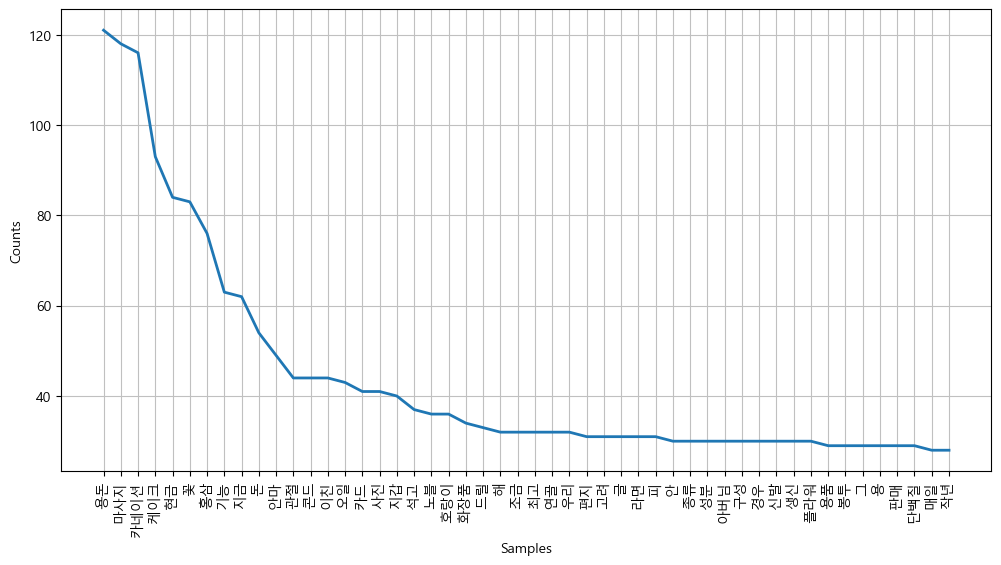

In [29]:
gift =nltk.Text(new_tokens,name='어버이날선물')
plt.figure(figsize=(12,6))
gift.plot(50);

In [28]:
stoptext = """"
    선물 추천 어버이날 부모님 것 수 건강 제품 제 이 저 식품 가격 도움 요 참고 스 사용 활동
    때 파트너 고민 수수료 위 구매 등 세트 생각 제공 거 요즘 기 분 상품 박스 정액 한번 마음
    이미지 존재 링크 일환 아래 정말 더 선택 향 가능 부담 자금 쿠팡 하나 관리 가지 양제 포스팅
    답변 가장 방향 주문 준비 인기 브랜드 날 디자인 정보 건 저희 의미 채택 이번 배송  질문 아버지
    일 시간 나이 어머니 꼭 엄마 정도 걸 운동 때문 제작 좀 자 발 사 보시 직접 도 후기 제일 번 
    포장 할인 평소 아빠 관련 다른 효과 집 전 중 보충 바로 통해
"""
stop_words =stoptext.split()
new_tokens =[word for word in new_tokens if word not in stop_words]
new_tokens[:10]

['어깨', '무릎', '매번', '칭찬', '답글', '원적외선', '치료', '일반', '적외선', '사기']

- 워드 클라우드 그리기

In [31]:
# 언급된 단어 갯수
data = gift.vocab().most_common(5)
data

[('용돈', 121), ('마사지', 118), ('카네이션', 116), ('케이크', 93), ('현금', 84)]

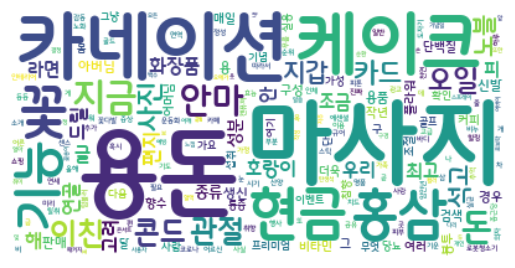

In [34]:
wc =WordCloud(
    background_color='white',random_state=2023,
    font_path='c:/Windows/Fonts/MalangmalangB.ttf',relative_scaling=0.2
).generate_from_frequencies(dict(gift.vocab().most_common(300)))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

- 그림 위에 표시

In [36]:
mask =np.array(Image.open('data/heart.jpg'))

from wordcloud import ImageColorGenerator
image_colors = ImageColorGenerator(mask)

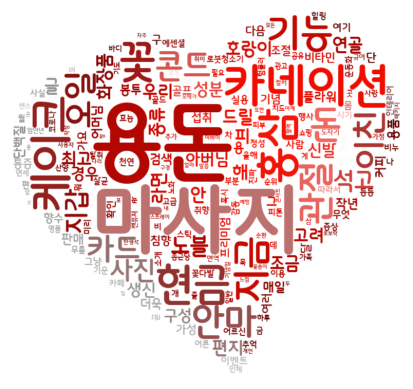

In [37]:
wc =WordCloud(
    background_color='white',random_state=2023,
    font_path='c:/Windows/Fonts/MalangmalangB.ttf',relative_scaling=0.2,mask=mask
).generate_from_frequencies(dict(gift.vocab().most_common(300)))

plt.imshow(wc.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')
plt.show()